<a href="https://colab.research.google.com/github/eji58/Financial-Phrase-Bank-/blob/main/Financial_Phrase_Bank_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This FinancialPhraseBank dataset contains the sentiments for financial news headlines from the perspective of a retail investor. The dataset contains two columns, "Sentiment" and "News Headline". The sentiment can be negative, neutral, or positive.

[data](https://www.kaggle.com/datasets/ankurzing/sentiment-analysis-for-financial-news)

**Main Objective:**

The CVS file contains a labeled dataset.

Download the dataset and use it for your assignment.

Apply the appropriate NLP preprocessing and transformation pipeline.

Build a sentiment classifier (using ML).

Implement the appropriate evaluation metrics and state your findings.

Use the trained model for single inference cases and check the results.

## Import libraries


In [ ]:
#  Importing Libraries

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import os
import re
import string
import sys
import nltk
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords
nltk.download('stopwords')

from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob

from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences


import sklearn.preprocessing as pr

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Load data

In [ ]:
import pandas as pd
url='https://drive.google.com/file/d/1LjZrr3lOKQcH_l7ArpF_CybS2OaDKXjT/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url,engine="python",encoding="ISO-8859-1")
# add columns names
df2=pd.DataFrame([[df.keys()[0], df.keys()[1]]], columns=list([df.keys()[0],df.keys()[1]]), index=[4845])
df=df.append(df2, ignore_index=True).set_axis(['sentiment', 'news'], axis=1, inplace=False)
df

,sentiment,news
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...
...,...,...
4841,neutral,Rinkuskiai 's beer sales fell by 6.5 per cent ...
4842,negative,Operating profit fell to EUR 35.4 mn from EUR ...
4843,negative,Net sales of the Paper segment decreased to EU...
4844,negative,Sales in Finland decreased by 10.5 % in Januar...


In [ ]:
df.to_csv("news.csv")

In [ ]:
# copy data
df1=df.copy

In [ ]:
# no. of null values
df.isnull().sum()

sentiment    0
news         0
dtype: int64

In [ ]:
# No. of lebels
df['sentiment'].value_counts()

neutral     2879
positive    1363
negative     604
Name: sentiment, dtype: int64

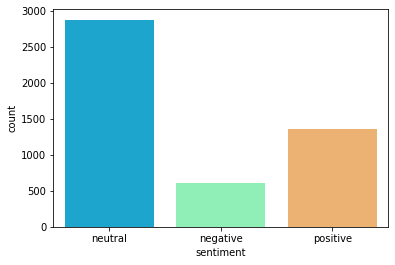

In [ ]:
sns.countplot(x="sentiment",data=df,palette="rainbow")

## Preprocessing

### **Cleaning** then **StopWord** removing then extract **stemming** words 

In [ ]:
# cleaning the data from the noisy character 

def cleaning(text):
    # remove non letters or non number
    text = re.sub(r"[^a-zA-Z0-9]", " ", text)
    # convert to lowercase
    text = text.lower()
    return text

In [ ]:
def remove_stopwords(text):
      # tokenize
      words = text.split()
      # remove stopwords
      words = [w for w in words if w not in stopwords.words("english")]
      return words


In [ ]:
def stemming(text):
  # apply stemming
  words = [PorterStemmer().stem(w) for w in text]
  # return list
  return words

In [ ]:
#  apply all the functions to row-by-row data 
for i in range(len(df['news'])):
  df['news'][i]=cleaning(df['news'][i])
  df['news'][i]=remove_stopwords(df['news'][i])
  df['news'][i]=stemming(df['news'][i])

In [ ]:
print(df['news'][0])

['technopoli', 'plan', 'develop', 'stage', 'area', 'less', '100', '000', 'squar', 'meter', 'order', 'host', 'compani', 'work', 'comput', 'technolog', 'telecommun', 'statement', 'said']


In [ ]:
df1

<bound method NDFrame.copy of      sentiment                                               news
0      neutral  [technopoli, plan, develop, stage, area, less,...
1     negative  [intern, electron, industri, compani, elcoteq,...
2     positive  [new, product, plant, compani, would, increas,...
3     positive  [accord, compani, updat, strategi, year, 2009,...
4     positive  [financ, aspocomp, growth, aspocomp, aggress, ...
...        ...                                                ...
4841   neutral  [rinkuskiai, beer, sale, fell, 6, 5, per, cent...
4842  negative  [oper, profit, fell, eur, 35, 4, mn, eur, 68, ...
4843  negative  [net, sale, paper, segment, decreas, eur, 221,...
4844  negative  [sale, finland, decreas, 10, 5, januari, sale,...
4845   neutral  [accord, gran, compani, plan, move, product, r...

[4846 rows x 2 columns]>

In [ ]:
def tokenize_pad_sequences(text):
    '''
    This function tokenize the input text into sequnences of intergers and then
    pad each sequence to the same length
    '''
    # Text tokenization
    tokenizer = Tokenizer(num_words=1500, lower=True, split=' ')
    tokenizer.fit_on_texts(text)
    # Transforms text to a sequence of integers
    News = tokenizer.texts_to_sequences(text)
    # Pad sequences to the same length
    News = pad_sequences(News, padding='post', maxlen=60)
    # return sequences
    return News, tokenizer

In [ ]:
News, tokenizer =tokenize_pad_sequences(df['news'])
News

array([[757,  89,  43, ...,   0,   0,   0],
       [223, 152,  58, ...,   0,   0,   0],
       [ 28,  20,  65, ...,   0,   0,   0],
       ...,
       [ 13,   7, 100, ...,   0,   0,   0],
       [  7,  14, 116, ...,   0,   0,   0],
       [ 74,   2,  89, ...,   0,   0,   0]], dtype=int32)

### Vectorazing

In [ ]:
# Vectorize Data Using CountVectorizer method
count_vector = CountVectorizer(max_features=500, preprocessor=lambda x: x,tokenizer=lambda x: x) 
count_vector

CountVectorizer(max_features=500,
                preprocessor=<function <lambda> at 0x7f463bede310>,
                tokenizer=<function <lambda> at 0x7f463bede700>)

In [ ]:
News = count_vector.fit_transform(News).toarray()
News

array([[42,  0,  1, ...,  0,  0,  0],
       [42,  0,  2, ...,  0,  0,  0],
       [40,  0,  1, ...,  0,  0,  0],
       ...,
       [28,  4,  0, ...,  1,  0,  0],
       [49,  0,  0, ...,  0,  0,  0],
       [52,  0,  2, ...,  0,  0,  0]])

In [ ]:
News = pr.normalize(News, axis=1)
News

array([[0.99717753, 0.        , 0.02374232, ..., 0.        , 0.        ,
        0.        ],
       [0.99605521, 0.        , 0.0474312 , ..., 0.        , 0.        ,
        0.        ],
       [0.99136319, 0.        , 0.02478408, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.96322928, 0.13760418, 0.        , ..., 0.03440105, 0.        ,
        0.        ],
       [0.99730374, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.998156  , 0.        , 0.03839062, ..., 0.        , 0.        ,
        0.        ]])

## Spliting

In [ ]:
#splitting the data for training and testing
X_train,X_test,y_train,y_test =  train_test_split(News,df['sentiment'],test_size=0.25)

## Modeling

In [ ]:
#Initialising Multinomial Naive Bayes
model = MultinomialNB()
model.fit(X_train,y_train)

MultinomialNB()

## Evaluation

In [ ]:
#predicting the results
prediction = model.predict(X_test)
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

    negative       0.00      0.00      0.00       152
     neutral       0.60      1.00      0.75       729
    positive       0.00      0.00      0.00       331

    accuracy                           0.60      1212
   macro avg       0.20      0.33      0.25      1212
weighted avg       0.36      0.60      0.45      1212



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
